In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from google.colab import drive
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D;
from sklearn.datasets import make_blobs

drive.mount('/content/drive') 
folerPath="/content/drive/MyDrive"
df=pd.read_csv('/content/drive/MyDrive/ECO4150Database-1.csv')#import file into colab
columns = df.columns 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In below figure, academic institutions researchers' have more people attend into Energy Modelling Initiative
Type
Academic      54
Company        6
Consultant    22
Government    38
NGO           12
Utilities     26
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Name,Publications,Number of Reads,Citations,Projects,Type,Source
0,Mohammadreza Ahang,5.0,35908.0,15.0,1.0,Academic,ResearchGate
1,Reza Arjmand,3.0,NaN,17.0,NaN,Academic,Google Scholar
2,Viviane Aubin,2.0,20.0,0.0,NaN,Utilities,ResearchGate
3,Alison Bailie,3.0,135.0,16.0,NaN,Government,ResearchGate
4,Sahand Behboodi,16.0,2653.0,359.0,NaN,Company,ResearchGate


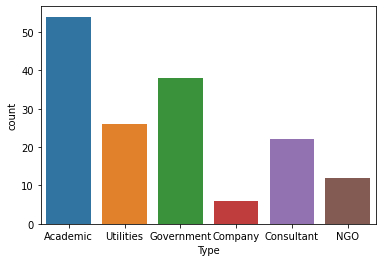

In [ ]:

#Filling missing data as 0 in all columns
print("In below figure, academic institutions researchers' have more people attend into Energy Modelling Initiative")
df.loc[df['Type']=='University','Type']='Academic'
print(df.groupby('Type').size())
sns.countplot(df['Type'],label="Count")
df.head()
#Counting numbers of each type

In [ ]:
#df['Publications']=df['Publications'].fillna(0)
#df['Number of Reads']=df['Number of Reads'].fillna(0)
#df['Citations']=df['Citations'].fillna(0)
#df['Projects']=df['Projects'].fillna(0)
#print("Count numbers of Institution Type of Academaic not null value")
#df = df[df['Publications'].notnull()]
print('There are 94%(51 out of 54) people have their articles posted on website in type of Academic')
df.loc[df['Type']=='Academic'].count()


There are 94%(51 out of 54) people have their articles posted on website in type of Academic


Name               54
Publications       51
Number of Reads    23
Citations          50
Projects           17
Type               54
Source             42
dtype: int64

In [ ]:
print('There are only 42%(11 out of 26) people have their articles posted on website in type of Utilities')
df.loc[df['Type']=='Utilities'].count()

There are only 42%(11 out of 26) people have their articles posted on website in type of Utilities


Name               26
Publications       11
Number of Reads     5
Citations          10
Projects            4
Type               26
Source             10
dtype: int64

In [ ]:
print('There are only 53% (20 out of 38) people have their articles posted on website in type of Government')
df.loc[df['Type']=='Government'].count()

There are only 53% (20 out of 38) people have their articles posted on website in type of Government


Name               38
Publications       20
Number of Reads     8
Citations          18
Projects            5
Type               38
Source             18
dtype: int64

In [ ]:
print('There are only 50%(3 out of 6) people have their articles posted on website in type of Company')
df.loc[df['Type']=='Company'].count()

There are only 50%(3 out of 6) people have their articles posted on website in type of Company


Name               6
Publications       3
Number of Reads    2
Citations          3
Projects           1
Type               6
Source             3
dtype: int64

In [ ]:
print('There are only 54%(12 out of 22) people have their articles posted on website in type of Consultant')
df.loc[df['Type']=='Consultant'].count()

There are only 54%(12 out of 22) people have their articles posted on website in type of Consultant


Name               22
Publications       12
Number of Reads     3
Citations          11
Projects            3
Type               22
Source             10
dtype: int64

In [ ]:

print('There are only 58%(7 out of 12) people have their articles posted on website in type of NGO')
df.loc[df['Type']=='NGO'].count()

There are only 58%(7 out of 12) people have their articles posted on website in type of NGO


Name               12
Publications        7
Number of Reads     1
Citations           6
Projects            0
Type               12
Source              5
dtype: int64

Based on above analysis, researchers who are belongs to academic institutions have highest exposure rate of their articles.

The lowest exposure rate is researchers who are belons to utilites institutions.

Due to the other types do not have enough data to support the opinion. 
The projects which researchers attended classified by different type of institutions. 
Academic institutions still have highest projects attendance compare to others. 


In [ ]:
print(df.groupby('Source').size())


Source
Google Scholar    47
ResearchGate      41
dtype: int64


In [ ]:
df['Number of Reads']=df['Number of Reads'].fillna(0)
df.rename(columns={'Number of Reads':'Reads'},inplace=True)
df['Projects']=df['Projects'].fillna(0)
df['Citations']=df['Citations'].fillna(0)
df=df.drop(df[df.Citations==0].index)
df

,Name,Publications,Reads,Citations,Projects,Type,Source
0,Mohammadreza Ahang,5.0,35908.0,15.0,1.0,University,ResearchGate
1,Reza Arjmand,3.0,0.0,17.0,0.0,University,Google Scholar
3,Alison Bailie,3.0,135.0,16.0,0.0,Government,ResearchGate
4,Sahand Behboodi,16.0,2653.0,359.0,0.0,Company,ResearchGate
7,Jean-Thomas Bernard,155.0,4956.0,947.0,4.0,University,ResearchGate
...,...,...,...,...,...,...,...
152,Greg Young-Morris,3.0,264.0,42.0,0.0,Utilities,ResearchGate
153,Danilo Yu,5.0,369.0,15.0,0.0,University,ResearchGate
155,Hamid Zareipour,168.0,0.0,9742.0,0.0,University,Google Scholar
156,Peter Zerek,1.0,0.0,1.0,0.0,Government,Google Scholar


In [ ]:
df=df.loc[:,['Publications','Reads','Citations','Projects','Type']]
df=df.loc[~df['Citations'].isna()]
df['citations']=np.log(df['Citations'])
display(df.describe().T)
df.head()

,count,mean,std,min,25%,50%,75%,max
Publications,91.0,55.362637,95.834871,1.0,5.000000,13.000000,52.000000,529.000000
Reads,91.0,2655.670330,7086.290627,0.0,0.000000,0.000000,1349.500000,40098.000000
Citations,91.0,1657.802198,4236.084569,1.0,31.500000,158.000000,782.500000,25572.000000
Projects,91.0,0.538462,1.222999,0.0,0.000000,0.000000,0.000000,6.000000
citations,91.0,5.186187,2.312490,0.0,3.449862,5.062595,6.658302,10.149253


,Publications,Reads,Citations,Projects,Type,citations
0,5.0,35908.0,15.0,1.0,University,2.708050
1,3.0,0.0,17.0,0.0,University,2.833213
3,3.0,135.0,16.0,0.0,Government,2.772589
4,16.0,2653.0,359.0,0.0,Company,5.883322
7,155.0,4956.0,947.0,4.0,University,6.853299


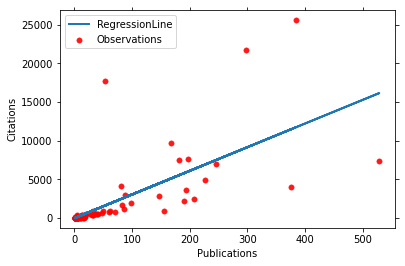

In [ ]:
from sklearn.linear_model import LinearRegression
plt.scatter(df.Publications,df.Citations,s=30,c='red',marker='o',alpha=0.9,linewidths=0.3,label='Observations')
reg = LinearRegression().fit(df.Publications.values.reshape(-1,1), df.Citations)
pred=reg.predict(df.Publications.values.reshape(-1,1))
plt.plot(df.Publications,pred,linewidth=2,label='RegressionLine')
plt.xlabel('Publications')
plt.ylabel('Citations')
plt.tick_params(top='off',right='off')
plt.legend(loc='upper left')
plt.show()

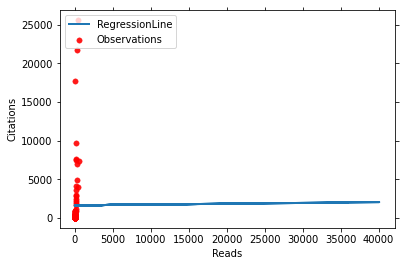

In [ ]:
from sklearn.linear_model import LinearRegression
plt.scatter(df.Publications,df.Citations,s=30,c='red',marker='o',alpha=0.9,linewidths=0.3,label='Observations')
reg = LinearRegression().fit(df.Reads.values.reshape(-1,1), df.Citations)
pred=reg.predict(df.Reads.values.reshape(-1,1))
plt.plot(df.Reads,pred,linewidth=2,label='RegressionLine')
plt.xlabel('Reads')
plt.ylabel('Citations')
plt.tick_params(top='off',right='off')
plt.legend(loc='upper left')
plt.show()

# Because it is flat line, hence Number of Reads has no ability to predict anything


[31.06448134 -0.04685839]
62.43102546460091


,Publications,Reads
count,91.000000,91.000000
mean,55.362637,2655.670330
std,95.834871,7086.290627
min,1.000000,0.000000
25%,5.000000,0.000000
50%,13.000000,0.000000
75%,52.000000,1349.500000
max,529.000000,40098.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.


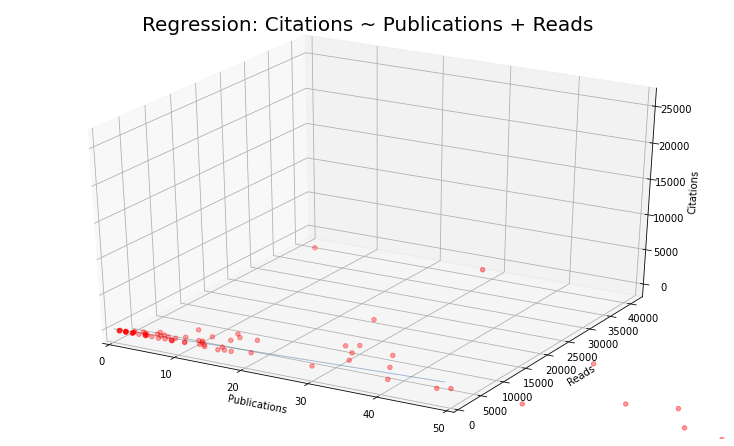

In [ ]:
#How about combine both of them together?

# Get estimates
#Get estimates
regr=skl_lm.LinearRegression()
X = df[['Publications', 'Reads']]
y = df.Citations
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
display(df[['Publications', 'Reads']].describe())

# Create a coordinate grid
Publications = np.arange(0,50)
Reads = np.arange(0,300)

B1, B2 = np.meshgrid(Publications, Reads, indexing='xy')
Z = np.zeros((Reads.size, Publications.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Citations ~ Publications + Reads', fontsize=20)

ax = Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(df.Publications, df.Reads, df.Citations, c='r')

ax.set_xlabel('Publications')
ax.set_xlim(0,50)
ax.set_ylabel('Reads')
ax.set_ylim(ymin=0)
ax.set_zlabel('Citations')
plt.show()

In [ ]:
results = smf.ols('Citations ~ Publications+Reads',data=df).fit()
print(results.summary()) #OLS regression details for Citations related to Publications and Number of Reads

                            OLS Regression Results                            
Dep. Variable:              Citations   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     41.45
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           2.08e-13
Time:                        04:09:15   Log-Likelihood:                -858.40
No. Observations:                  91   AIC:                             1723.
Df Residuals:                      88   BIC:                             1730.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       62.4310    385.065      0.162   

In-sample MSE: 0.7713277281705173


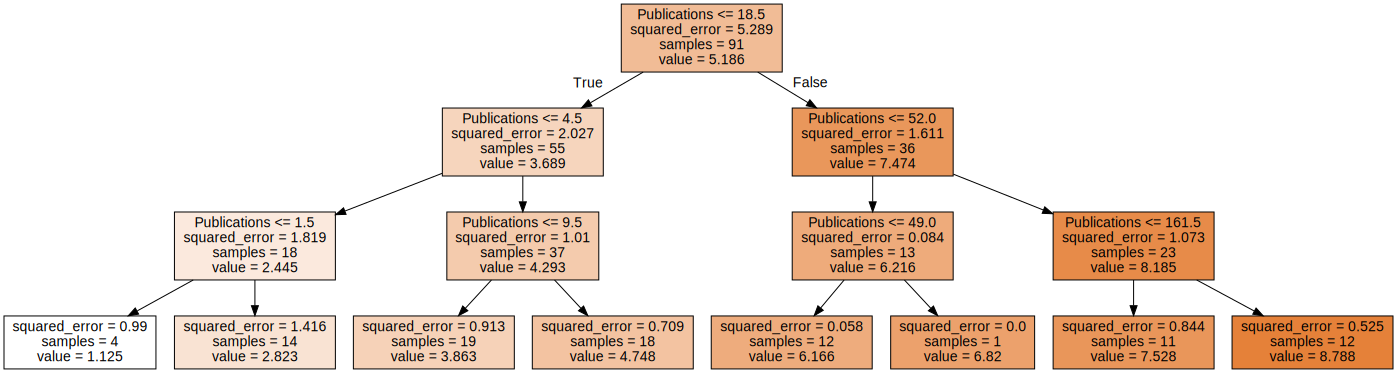

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree  import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection  import train_test_split
# Import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Split dataset into 80% train, 20% test
#
X_train=df.loc[:,['Reads','Publications']]
y_train=df.loc[:,'citations']
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=3, random_state=1706)
dt.fit(X_train,y_train)

# Predict test set labels
y_pred = dt.predict(X_train)
# Evaluate test-set accuracy
print(f"In-sample MSE: {mean_squared_error(df['citations'], y_pred)}")

#store label name
labels = X_train.columns.tolist()

# print decision tree
graph = Source(tree.export_graphviz(dt, out_file=None, feature_names=labels , filled = True))
display(SVG(graph.pipe(format='svg')))